# Data pre-processing

## Import data

In [1]:
setwd("/media/miray/projects/Gas Ai/data/1")
data.base <- read.csv("base.csv")
data.masraf <- read.csv("masraf.csv")

print(head(data.base))
cat('\n\n')
print(head(data.masraf))

  CITYNAME CITYID NAHIE       KEYNO ADDRESS_CODE FREQ TYPEOFUSE ZARFIAT ZIRBANA
1  اردبيل       1     1 23000334787  10105660007    C        40       6      60
2  اردبيل       1     1 23000294966  10105130000    C        40       6     100
3  اردبيل       1     1 23000326971  10105660002    C        40       6      60
4  اردبيل       1     1 23000330109  10105660004    C        40       6      60
5  اردبيل       1     1 23000325483  10105660001    C        40       6     110
6  اردبيل       1     1 23000328337  10105660003    C        40       6      60
  TEDADVAHED SHAHRROSTA MAXMASRAFSAAT
1          1       1021             6
2          1       1021             6
3          1       1021             6
4          1       1021             6
5          1       1021             6
6          1       1021             6


       BUL_ID   FROMDATE     TODATE CONSUMPTION
1 23000330109 1399/03/24 1399/05/06          55
2 23000330109 1399/02/08 1399/03/24         220
3 23000330109 1398/12/20 139

## Find duplicate data in data.base and data with irrational area properties

In [2]:
# data.multikeno = data that more than one in datasheet
data.noise <- c(data.base$KEYNO[ave(data.base$KEYNO,data.base$KEYNO,FUN = length) > 1 | data.base$ZIRBANA < 10])
# data = data that only one in datasheet
data.keyno <- data.base$KEYNO[!(data.base$KEYNO %in% data.noise)]
# data.base = data that in data.keyno
data.base <- data.base[data.base$KEYNO %in% data.keyno,]
# data.masraf = data that in data.keyno
data.masraf <- data.masraf[data.masraf$BUL_ID %in% data.keyno,]
# print noise data
print(data.noise)

  [1] 23000465965 23000604518 23002953616 23004282855 23004514194 23004613800
  [7] 23004725630 23004726901 23004743137 23004693850 23005032817 23004989520
 [13] 23005037420 23004871982 23005395028 23005340118 23005427907 23005522239
 [19] 23005509119 23005378145 23005722504 23005582395 23005552288 23005710347
 [25] 23005983609 23005997800 23006077274 23006148690 23006065017 23006002175
 [31] 23006240580 23006403547 23006294649 23006223186 23006513911 23006567401
 [37] 23006711200 23006862678 23006872360 23006920280 23006875440 23006917431
 [43] 23007002630 23006969782 23007143963 23007185060 23007252034 23007291150
 [49] 23007149839 23007162664 23007246910 23007259408 23007269484 23007337594
 [55] 23007340912 23007622558 23007626547 23007556787 23007937096 23007806555
 [61] 23007804737 23008141679 23008017628 23008009754 23008192079 23008228426
 [67] 23008363136 23008395414 23008509152 23008505979 23008522851 23008576568
 [73] 23008621751 23008779266 23008693191 23008878687 2300872795

## Categorizing each subscriber data

In [7]:
datasheet <- list()
for(o in 1:length(data.base$KEYNO)){
    # Subscribers' consumption in readings divided by their area add to 
    datasheet[o] <- list(data.masraf$CONSUMPTION[data.masraf$BUL_ID == data.base$KEYNO[o]]/data.base$ZIRBANA[o])
}

print(datasheet[1:6])

[[1]]
 [1] 1.750000 1.483333 7.516667 9.416667 8.666667 7.500000 2.250000 1.333333
 [9] 1.500000 2.583333 8.000000 7.416667 9.583333 6.500000 3.083333 1.500000
[17] 2.166667 2.833333 2.483333 7.283333

[[2]]
 [1]  3.00  5.70  9.80 10.70  7.40  2.30  1.20  0.55  1.15  7.05  6.45  8.30
[13]  5.40  1.70  0.40  0.45  0.70  1.74  3.25

[[3]]
 [1] 0.6666667 0.8666667 4.6333333 4.4166667 5.1666667 4.6666667 1.5000000
 [8] 1.2500000 0.5833333 1.5000000 4.9166667 4.5000000 5.4166667 3.3333333
[15] 1.6666667 0.5833333 0.5833333 1.5833333 2.0166667 4.6333333

[[4]]
 [1] 0.9166667 3.6666667 3.8333333 6.2500000 6.5000000 4.3333333 1.4166667
 [8] 0.7500000 0.8333333 1.3333333 4.8333333 4.0833333 4.9166667 2.9166667
[15] 1.3333333 0.4166667 0.6666667 1.0000000 0.2833333 3.0666667

[[5]]
 [1] 0.8181818 2.5909091 4.7727273 6.3636364 6.8636364 5.0454545 2.1363636
 [8] 0.9090909 0.6818182 1.7272727 6.0909091 4.6818182 6.4090909 5.0000000
[15] 2.5000000 0.7727273 0.8636364 1.4545455 1.5181818 3.4272727

[

# Processing

## See last data on graph

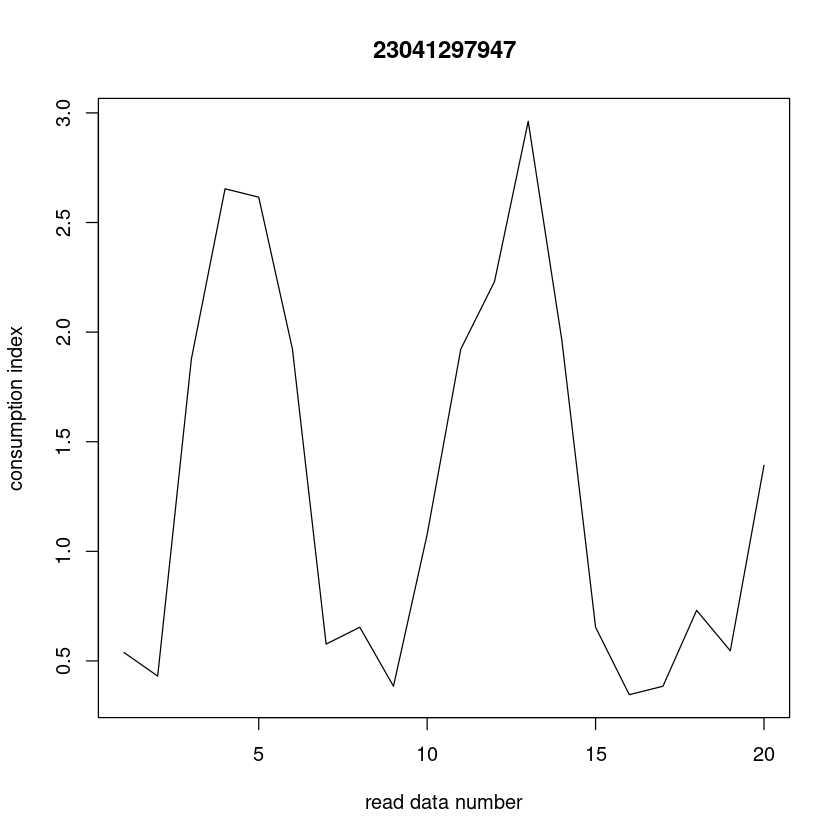

In [4]:
plot(unlist(datasheet[776]),type = 'l',
     main = data.base$KEYNO[776],ylab = 'consumption index',xlab = 'read data number')

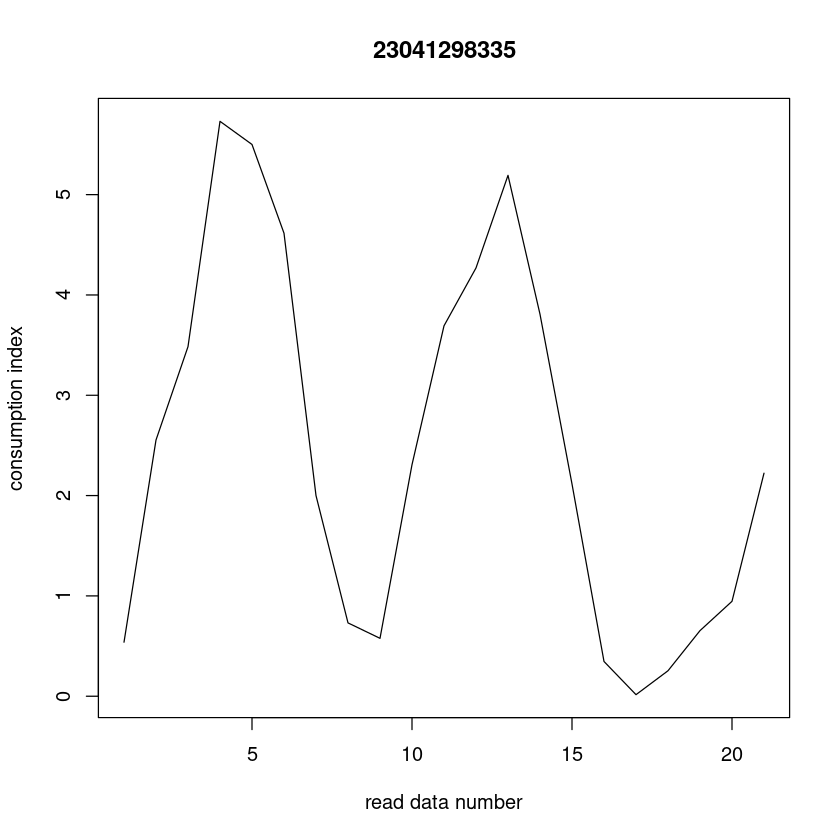

In [5]:
plot(unlist(datasheet[758]),type = 'l',
     main = data.base$KEYNO[758],ylab = 'consumption index',xlab = 'read data number')

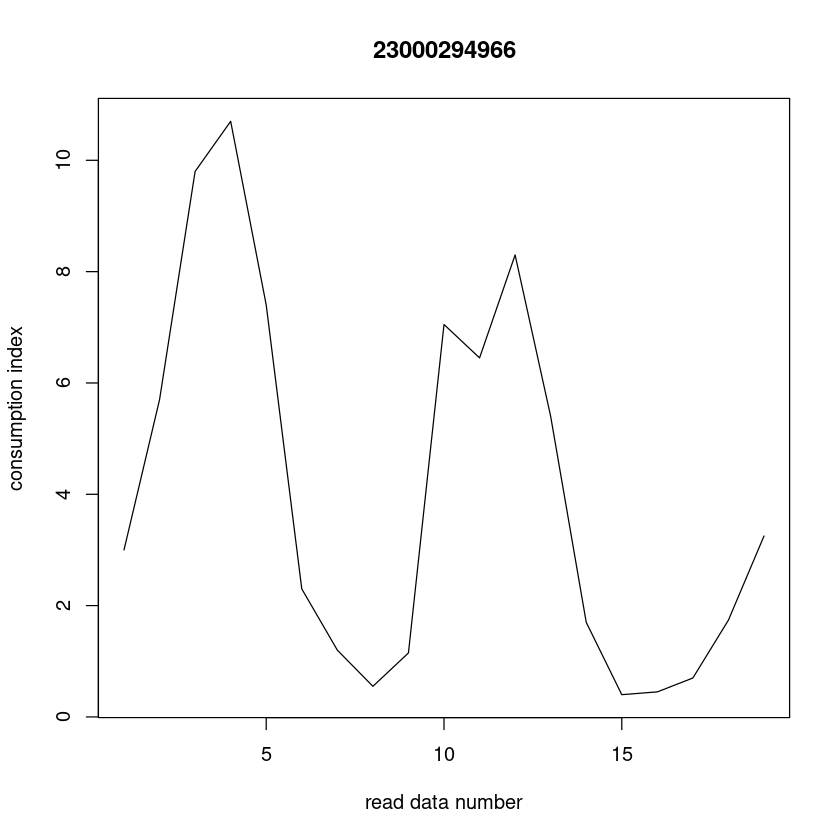

In [8]:
plot(unlist(datasheet[2]),type = 'l',
     main = data.base$KEYNO[2],ylab = 'consumption index',xlab = 'read data number')

##### note : Because the data are not temperature dependent, the plotted graphs show sinusoidal motions, and the amount of these motions is entirely dependent on the local temperature. If we divide this data by temperature, all the data will tend to be an average and will be more accurate. However, a relative index can be created by using the distance between people's locations that In this relative index, the deviation of the data compared to the previous data can be predicted